In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [17]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Joining Data in SQL'
data = make_dir_line(modality, project)

raw = data('raw')

In [18]:
import sqlite3

conn = sqlite3.connect(":memory:")  ## aca se indica el nombre de la db.
cur = conn.cursor()

# 5.3.0 Set Theory for SQL Joins


In [19]:
conn.executescript(
    """
    
DROP TABLE IF EXISTS cities;

CREATE TABLE cities (
    name                  STRING,
    country_code          STRING,
    city_proper_pop       DOUBLE,
    metroarea_pop         DOUBLE,
    urbanarea_pop         DOUBLE
);


DROP TABLE IF EXISTS countries;

CREATE TABLE countries (
  code                  STRING     PRIMARY KEY,
  name                  VARCHAR,
  continent             VARCHAR,
  region                VARCHAR,
  surface_area          REAL,
  indep_year            INTEGER,
  local_name            VARCHAR,
  gov_form              VARCHAR,
  capital               VARCHAR,
  cap_long              REAL,
  cap_lat               REAL
);


DROP TABLE IF EXISTS economies;

CREATE TABLE economies (
  econ_id               INTEGER     PRIMARY KEY,
  code                  STRING,
  year                  INTEGER,
  income_group          VARCHAR,
  gdp_percapita         REAL,
  gross_savings         REAL,
  inflation_rate        REAL,
  total_investment      REAL,
  unemployment_rate     REAL,
  exports               REAL,
  imports               REAL
);


DROP TABLE IF EXISTS languages;

CREATE TABLE languages (
  lang_id               INTEGER     PRIMARY KEY,
  code                  VARCHAR,
  name                  VARCHAR,
  percent               REAL,
  official              BOOLEAN
);


DROP TABLE IF EXISTS populations;

CREATE TABLE populations (
  pop_id                DOUBLE     PRIMARY KEY,
  country_code          VARCHAR,
  year                  DOUBLE,
  fertility_rate        REAL,
  life_expectancy       REAL,
  size                  DOUBLE
);


DROP TABLE IF EXISTS currencies;

CREATE TABLE currencies (
  curr_id               INTEGER     PRIMARY KEY,
  code                  VARCHAR,
  basic_unit            VARCHAR,
  curr_code             VARCHAR,
  frac_unit             VARCHAR,
  frac_perbasic         REAL
);


DROP TABLE IF EXISTS economies2015;

CREATE TABLE economies2015 (
  code                  VARCHAR     PRIMARY KEY,
  year                  INTEGER,
  income_group          VARCHAR,
  gross_savings         REAL
);


DROP TABLE IF EXISTS economies2019;

CREATE TABLE economies2019 (
  code                  VARCHAR     PRIMARY KEY,
  year                  INTEGER,
  income_group          VARCHAR,
  gross_savings         REAL
);


"""
)
conn.commit()

In [20]:
df = pd.read_csv(raw / 'countries/cities.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
cities = list(zip(df.name, df.country_code, df.city_proper_pop, df.metroarea_pop, df.urbanarea_pop))
cur.executemany("INSERT INTO cities VALUES  (?,?,?,?,?)", cities)

In [21]:
df = pd.read_csv(raw / 'countries/countries.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
countries = list(zip(df.code, df.country_name, df.continent, df.region, df.surface_area, df.indep_year, df.local_name, df.gov_form, df.capital, df.cap_long, df.cap_lat))
cur.executemany("INSERT INTO countries VALUES  (?,?,?,?,?,?,?,?,?,?,?)", countries)

In [22]:
df = pd.read_csv(raw / 'countries/economies.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies = list(zip(df.econ_id, df.code, df.year, df.income_group, df.gdp_percapita, df.gross_savings, df.inflation_rate, df.total_investment, df.unemployment_rate, df.exports, df.imports))
cur.executemany("INSERT INTO economies VALUES  (?,?,?,?,?,?,?,?,?,?,?)", economies)

In [23]:
df = pd.read_csv(raw / 'countries/languages.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
languages = list(zip(df.lang_id, df.code, df.name, df.percent, df.official))
cur.executemany("INSERT INTO languages VALUES  (?,?,?,?,?)", languages)

In [24]:
df = pd.read_csv(raw / 'countries/populations.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
populations = list(zip(df.pop_id, df.country_code, df.year, df.fertility_rate, df.life_expectancy, str(df.size)))
cur.executemany("INSERT INTO populations VALUES  (?,?,?,?,?,?)", populations)

In [25]:
df = pd.read_csv(raw / 'countries/currencies.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
currencies = list(zip(df.curr_id, df.code, df.basic_unit, df.curr_code, df.frac_unit, df.frac_perbasic))
cur.executemany("INSERT INTO currencies VALUES  (?,?,?,?,?,?)", currencies)

In [26]:
df = pd.read_csv(raw / 'countries/economies2015.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies2019 = list(zip(df.code, df.year, df.income_group, df.gross_savings))
cur.executemany("INSERT INTO economies2019 VALUES  (?,?,?,?)", economies2019)

In [27]:
df = pd.read_csv(raw / 'countries/economies2019.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies2015 = list(zip(df.code, df.year, df.income_group, df.gross_savings))
cur.executemany("INSERT INTO economies2015 VALUES  (?,?,?,?)", economies2015)

## 5.3.2 UNION vs. UNION ALL

Question:

What result will the following SQL query produce?

```python

    SELECT * 
    FROM languages
    UNION
    SELECT * 
    FROM currencies;

```

R:/ A SQL error, because languages and currencies do not have the same number of field.

```python

    SELECT code FROM
    languages
    UNION ALL
    SELECT code FROM 
    currencies;

```

R:/ An unordered list of each country code in languages and currencies, including duplicates.

```python

    SELECT code 
    FROM languages
    UNION
    SELECT curr_id 
    FROM currencies;

```

R:/ A SQL error, because code and curr_id are not of the same data type.


## 5.3.3 Comparing global economies

In [28]:
# -- Select all fields from economies2015, Set operation, Select all fields from economies2019
cur.execute("""
            
            SELECT *
            FROM economies2015
            UNION
            SELECT *
            FROM economies2019
            ORDER BY code, year;
            
            """).fetchall()

[('ABW', 2015, 'High income', 14.86785151),
 ('AGO', 2015, 'Lower middle income', 25.02132654),
 ('AGO', 2019, 'Lower middle income', 25.52484772),
 ('ALB', 2015, 'Upper middle income', 16.8639814),
 ('ALB', 2019, 'Upper middle income', 14.4998255),
 ('ARG', 2015, 'Upper middle income', 14.28730262),
 ('ARG', 2019, 'Upper middle income', 14.28529512),
 ('ARM', 2015, 'Upper middle income', 18.43038559),
 ('ARM', 2019, 'Upper middle income', 9.815573922),
 ('ATG', 2015, 'High income', 7.051264504),
 ('ATG', 2019, 'High income', 26.38342703),
 ('AUS', 2015, 'High income', 22.70271367),
 ('AUS', 2019, 'High income', 22.52853371),
 ('AUT', 2015, 'High income', 25.65331339),
 ('AUT', 2019, 'High income', 27.75799005),
 ('AZE', 2015, 'Upper middle income', 28.12191969),
 ('AZE', 2019, 'Upper middle income', 28.57354797),
 ('BDI', 2015, 'Low income', 11.22352302),
 ('BEL', 2015, 'High income', 25.00867822),
 ('BEL', 2019, 'High income', 25.09256403),
 ('BEN', 2015, 'Lower middle income', 13.86

## 5.3.4 Comparing two set operations

In [29]:
# -- Query that determines all pairs of code and year from economies and populations, without duplicates
cur.execute("""
            
            SELECT country_code
            FROM cities
            UNION
            SELECT code
            FROM currencies
            ORDER BY country_code;
            
            """).fetchall()

[('ABW',),
 ('AFG',),
 ('AGO',),
 ('AIA',),
 ('ALB',),
 ('AND',),
 ('ARE',),
 ('ARG',),
 ('ARM',),
 ('ATG',),
 ('AUS',),
 ('AUT',),
 ('AZE',),
 ('BDI',),
 ('BEL',),
 ('BEN',),
 ('BFA',),
 ('BGD',),
 ('BGR',),
 ('BHR',),
 ('BIH',),
 ('BLR',),
 ('BLZ',),
 ('BMU',),
 ('BOL',),
 ('BRA',),
 ('BRB',),
 ('BRN',),
 ('BTN',),
 ('BWA',),
 ('CAF',),
 ('CAN',),
 ('CCK',),
 ('CHE',),
 ('CHL',),
 ('CHN',),
 ('CIV',),
 ('CMR',),
 ('COD',),
 ('COG',),
 ('COK',),
 ('COL',),
 ('COM',),
 ('CPV',),
 ('CRI',),
 ('CUB',),
 ('CYM',),
 ('CYP',),
 ('CZE',),
 ('DEU',),
 ('DJI',),
 ('DMA',),
 ('DNK',),
 ('DOM',),
 ('DZA',),
 ('ECU',),
 ('EGY',),
 ('ERI',),
 ('ESP',),
 ('EST',),
 ('ETH',),
 ('FIN',),
 ('FLK',),
 ('FRA',),
 ('FRO',),
 ('GAB',),
 ('GBR',),
 ('GEO',),
 ('GHA',),
 ('GIB',),
 ('GIN',),
 ('GNB',),
 ('GNQ',),
 ('GRC',),
 ('GRD',),
 ('GTM',),
 ('GUY',),
 ('HKG',),
 ('HND',),
 ('HRV',),
 ('HTI',),
 ('HUN',),
 ('IDN',),
 ('IND',),
 ('IOT',),
 ('IRL',),
 ('IRN',),
 ('IRQ',),
 ('ISL',),
 ('ISR',),
 ('ITA',),

In [30]:
# -- Query that determines all pairs of code and year from economies and populations, with duplicates
cur.execute("""
            
            SELECT code, year
            FROM economies
            UNION ALL
            SELECT country_code, year
            FROM populations
            ORDER BY code, year;
            
            """).fetchall()

[('ABW', 2010.0),
 ('ABW', 2015.0),
 ('AFG', 2010),
 ('AFG', 2010.0),
 ('AFG', 2015),
 ('AFG', 2015.0),
 ('AGO', 2010),
 ('AGO', 2015),
 ('ALB', 2010),
 ('ALB', 2015),
 ('ARE', 2010),
 ('ARE', 2015),
 ('ARG', 2010),
 ('ARG', 2015),
 ('ARM', 2010),
 ('ARM', 2015),
 ('ATG', 2010),
 ('ATG', 2015),
 ('AUS', 2010),
 ('AUS', 2015),
 ('AUT', 2010),
 ('AUT', 2015),
 ('AZE', 2010),
 ('AZE', 2015),
 ('BDI', 2010),
 ('BDI', 2015),
 ('BEL', 2010),
 ('BEL', 2015),
 ('BEN', 2010),
 ('BEN', 2015),
 ('BFA', 2010),
 ('BFA', 2015),
 ('BGD', 2010),
 ('BGD', 2015),
 ('BGR', 2010),
 ('BGR', 2015),
 ('BHR', 2010),
 ('BHR', 2015),
 ('BHS', 2010),
 ('BHS', 2015),
 ('BIH', 2010),
 ('BIH', 2015),
 ('BLR', 2010),
 ('BLR', 2015),
 ('BLZ', 2010),
 ('BLZ', 2015),
 ('BOL', 2010),
 ('BOL', 2015),
 ('BRA', 2010),
 ('BRA', 2015),
 ('BRB', 2010),
 ('BRB', 2015),
 ('BRN', 2010),
 ('BRN', 2015),
 ('BTN', 2010),
 ('BTN', 2015),
 ('BWA', 2010),
 ('BWA', 2015),
 ('CAF', 2010),
 ('CAF', 2015),
 ('CAN', 2010),
 ('CAN', 2015),


## 5.3.6 INTERSECT

In [31]:
# -- Return all cities with the same name as a country
cur.execute("""
            
            SELECT name
            FROM countries
            INTERSECT
            SELECT name
            FROM cities;
            
            """).fetchall()

[('Singapore',)]

## 5.3.7 Review UNION and INTERSECT

Which of the following definitions of set operations is correct?

R:/ INTERSECT: returns only records appearing in both tables

## 5.3.9 You've got it, EXCEPT...

In [32]:
# -- Return all cities that do not have the same name as a country
cur.execute("""
            
            SELECT name
            FROM cities
            EXCEPT
            SELECT name
            FROM countries
            ORDER BY name;
            
            """).fetchall()

[('Abidjan',),
 ('Abu Dhabi',),
 ('Abuja',),
 ('Accra',),
 ('Addis Ababa',),
 ('Ahmedabad',),
 ('Alexandria',),
 ('Algiers',),
 ('Almaty',),
 ('Ankara',),
 ('Auckland',),
 ('Baghdad',),
 ('Baku',),
 ('Bandung',),
 ('Bangkok',),
 ('Barcelona',),
 ('Barranquilla',),
 ('Basra',),
 ('Beijing',),
 ('Belo Horizonte',),
 ('Bengaluru',),
 ('Berlin',),
 ('Bhopal',),
 ('Birmingham',),
 ('Bogota',),
 ('Brasilia',),
 ('Brazzaville',),
 ('Brisbane',),
 ('Bucharest',),
 ('Budapest',),
 ('Buenos Aires',),
 ('Busan',),
 ('Cairo',),
 ('Calgary',),
 ('Cali',),
 ('Caloocan',),
 ('Campinas',),
 ('Cape Town',),
 ('Caracas',),
 ('Casablanca',),
 ('Changchun',),
 ('Changsha',),
 ('Chaozhou',),
 ('Chengdu',),
 ('Chennai',),
 ('Chicago',),
 ('Chittagong',),
 ('Chongqing',),
 ('Cologne',),
 ('Cordoba',),
 ('Curitiba',),
 ('Daegu',),
 ('Daejeon',),
 ('Dakar',),
 ('Dalian',),
 ('Dallas',),
 ('Dar es Salaam',),
 ('Davao City',),
 ('Delhi',),
 ('Dhaka',),
 ('Dongguan',),
 ('Douala',),
 ('Dubai',),
 ('Durban',),
 ('

## 5.3.10 Calling all set operators

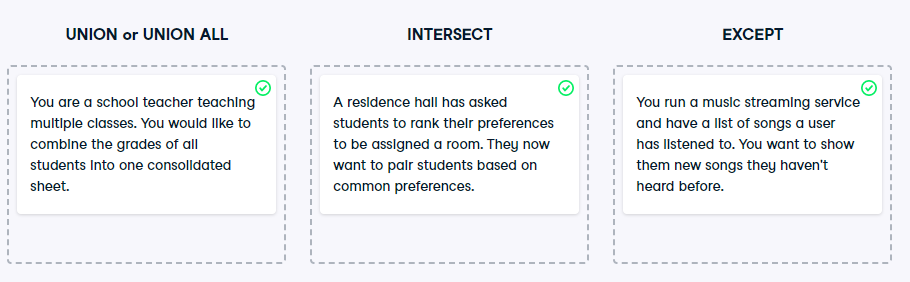

In [142]:
print('Ok_')

Ok_
